**<h1><center><center><center>BÀI TẬP COLAB SỐ 01 - 16/11/2022</center></h1>**
**<h1><center><center><center>RECORGNIZING HAND-WRITTEN DIGITS</center></h1>**

## Thông tin nhóm
1. Lê Tấn Lộc - 20521546
2. Nguyễn Hồng Anh Thư - 20520313
3. Bùi Quốc Thịnh - 20520934



# Nhận diện chữ số viết tay

## Nguồn tham khảo:
Recognizing hand-written digits - [LINK](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py)


This example shows how scikit-learn can be used to recognize images of
hand-written digits, from 0-9.

In [1]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

## Digits dataset

The digits dataset consists of 8x8
pixel images of digits. The ``images`` attribute of the dataset stores
8x8 arrays of grayscale values for each image. We will use these arrays to
visualize the first 4 images. The ``target`` attribute of the dataset stores
the digit each image represents and this is included in the title of the 4
plots below.

Note: if we were working from image files (e.g., 'png' files), we would load
them using :func:`matplotlib.pyplot.imread`.



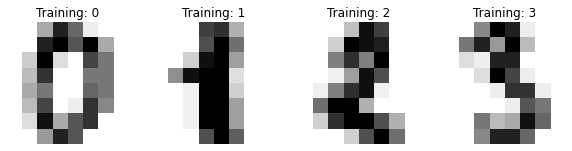

In [2]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

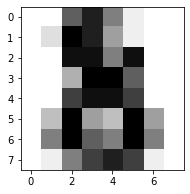

array([[ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.],
       [ 0.,  2., 16., 14.,  6.,  1.,  0.,  0.],
       [ 0.,  0., 15., 15.,  8., 15.,  0.,  0.],
       [ 0.,  0.,  5., 16., 16., 10.,  0.,  0.],
       [ 0.,  0., 12., 15., 15., 12.,  0.,  0.],
       [ 0.,  4., 16.,  6.,  4., 16.,  6.,  0.],
       [ 0.,  8., 16., 10.,  8., 16.,  8.,  0.],
       [ 0.,  1.,  8., 12., 14., 12.,  1.,  0.]])

In [3]:
#Xem thử định dạng của những bức ảnh được dùng để training
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
digits.images[-1]

## Classification

To apply a classifier on this data, we need to flatten the images, turning
each 2-D array of grayscale values from shape ``(8, 8)`` into shape
``(64,)``. Subsequently, the entire dataset will be of shape
``(n_samples, n_features)``, where ``n_samples`` is the number of images and
``n_features`` is the total number of pixels in each image.

We can then split the data into train and test subsets and fit a support
vector classifier on the train samples. The fitted classifier can
subsequently be used to predict the value of the digit for the samples
in the test subset.



In [4]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 80% train and 20% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

Below we visualize the first 4 test samples and show their predicted
digit value in the title.



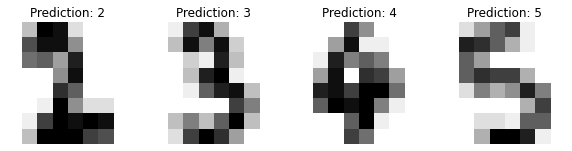

In [5]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

:func:`~sklearn.metrics.classification_report` builds a text report showing
the main classification metrics.



In [6]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        35
           3       0.97      0.81      0.88        37
           4       0.97      0.92      0.94        37
           5       0.93      1.00      0.96        37
           6       1.00      1.00      1.00        37
           7       0.97      1.00      0.99        36
           8       0.84      0.94      0.89        33
           9       0.95      0.95      0.95        37

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360




We can also plot a `confusion matrix <confusion_matrix>` of the
true digit values and the predicted digit values.


Confusion matrix:
[[34  0  0  0  1  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  2  0  1  4  0]
 [ 0  0  0  0 34  0  0  0  2  1]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  1  0  0  0  0  0  0 31  1]
 [ 0  0  0  1  0  1  0  0  0 35]]


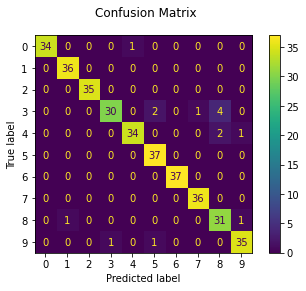

In [7]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

#Preprocess

In [8]:
# hàm cắt hình ảnh, loại bỏ tối đa nền trắng
def crop_img(inImg):
  inImg = 255 - inImg[:, :]

  maxUp = inImg.shape[0]//2
  maxDown = inImg.shape[0]//2
  maxLeft = inImg.shape[1]//2
  maxRight = inImg.shape[1]//2

  for i in range(inImg.shape[0]):
    for j in range(inImg.shape[1]):
      if inImg[i][j] > 160:
        if maxUp >= i: maxUp = i
        if maxDown <= i: maxDown = i
        if maxLeft >= j: maxLeft = j
        if maxRight <= j: maxRight = j

  editedImg = inImg[maxUp:maxDown+1, maxLeft:maxRight+1] 
  return editedImg

In [9]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def convert_image(img):
  image_blur = cv2.GaussianBlur(img,(5,5),0)
  #Chuyển đổi hình ảnh thang độ xám thành nhị phân
  im,thre = cv2.threshold(image_blur,127,255,cv2.THRESH_BINARY)
  #Show ảnh đã xử lý
  plt.imshow(255-thre, cmap = 'gray', interpolation='nearest')
  return thre

In [10]:
from sklearn.preprocessing import MinMaxScaler
def resize_scale(thre):
  a = cv2.resize(thre,(8,8),interpolation = cv2.INTER_AREA)

  scaler = MinMaxScaler(feature_range=(0,16))
  scaler.fit(a)
  data = scaler.transform(a)
  a = np.round(data)
  return a

# Predict digit from photo webcam

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


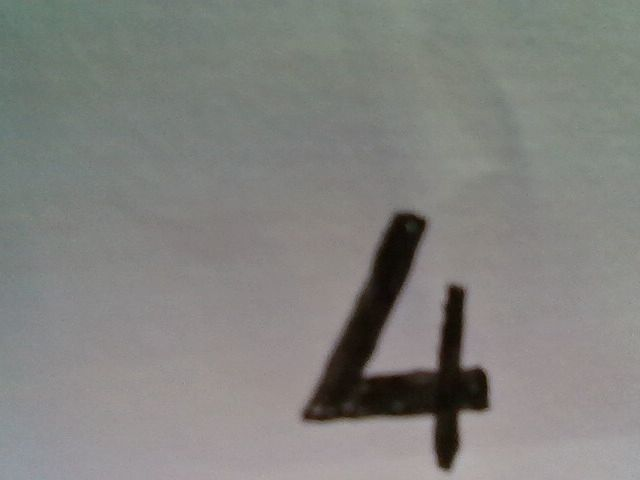

In [ ]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Gray image: 


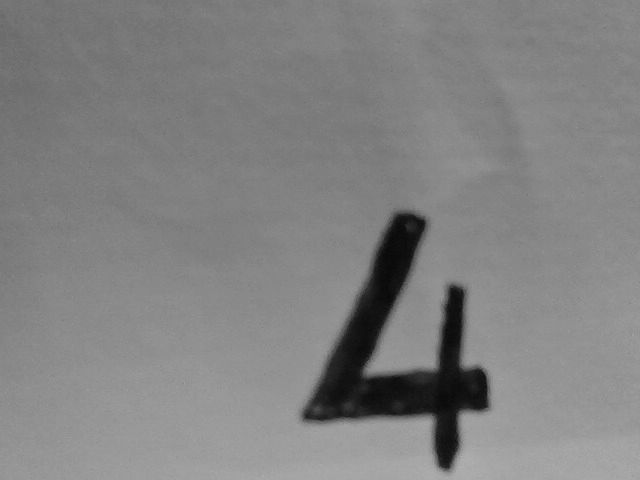

Croppped image: 


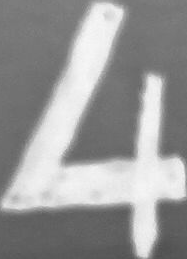

In [ ]:
from google.colab.patches import cv2_imshow
path_img = "/content/photo.jpg"
image = cv2.imread(path_img)
image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) #đọc hình và chuyển về ảnh trắng đen
print('Gray image: ')
cv2_imshow(image_gray)

croppedImg = crop_img(image_gray)
print('Croppped image: ')
cv2_imshow(croppedImg)

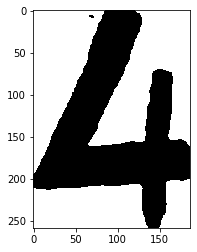

In [ ]:
thre = convert_image(croppedImg)

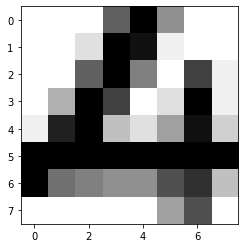

In [ ]:
a = resize_scale(thre)
plt.imshow(255-a, cmap = 'gray', interpolation='nearest')
a = a.reshape(1, 64)

In [ ]:
predict = clf.predict(a)
print("Result predict:",predict)

Result predict: [4]


# Nhận diện chữ số viết tay từ bộ dữ liệu thực tế

##Dữ liệu của nhóm

In [11]:
from google.colab import drive
import os

drive.mount('/content/drive')
dir_assignment = '/content/drive/MyDrive/Semester_4(2022-2023)/CS114/16_11'
# dir_assignment = '/content/drive/MyDrive/CS114/16_11'
path_dataset = os.path.join(dir_assignment,'dataset_digits')

Mounted at /content/drive


In [12]:
for file in os.listdir(path_dataset):

  _, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 10))

  #show ảnh gốc
  ax = axes[0]
  ax.set_axis_off()
  original = cv2.imread(path_dataset +'/'+ file)
  ax.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB), interpolation='nearest')
  ax.set_title(f'Original Image')

  #show ảnh xám
  ax = axes[1]
  ax.set_axis_off()
  img = cv2.imread(path_dataset +'/'+ file)
  image_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  ax.imshow(255-image_gray, cmap=plt.cm.gray_r, interpolation='nearest')
  ax.set_title(f'Gray Image')

  #Crop ảnh
  ax = axes[2]
  ax.set_axis_off()
  crop_original = crop_img(image_gray)
  ax.imshow(crop_original, cmap=plt.cm.gray_r, interpolation='nearest')
  ax.set_title(f'Gray Image After Cropping')

  #Xử lý ảnh theo threshold thành ảnh nhị phân
  ax = axes[3]
  ax.set_axis_off()
  thre = convert_image(crop_original)
  ax.imshow(255-thre,cmap='gray', interpolation='nearest')
  ax.set_title(f'Black and White Image')

  #Resize, scale ảnh và Predict
  ax = axes[4]
  ax.set_axis_off()

  a = resize_scale(thre)

  plt.imshow(255-a, cmap = 'gray', interpolation='nearest')
  a = a.reshape(1, 64)

  #Predict Image
  predict = clf.predict(a)
  ax.set_title(f'Resize Image, Predict = {predict}')

Output hidden; open in https://colab.research.google.com to view.

## Dữ liệu của các nhóm khác

###Clone dataset from github

In [13]:
#Tạo thư mục chứa dữ liệu clone từ github
%mkdir dataset
%cd dataset

/content/dataset


In [14]:
f = open("file.txt", "w")
for i in ("https://github.com/longtran071/CS114", "https://github.com/d3m0l15h/CS114.ML---MACHINE-LEARNING ", "https://github.com/Snallz121/3T---CS114 ", "https://github.com/pahopu/CS114", "https://github.com/NguyenDung278/CS114", "https://github.com/leetnlok/CS114.git ", "https://github.com/KMO147/cs114.git", "https://github.com/npq-thien/CS114_Machine-learning", "https://github.com/duyduy2808/CS114/tree/main/C114", "https://github.com/mquan8342/cs114.git", "https://github.com/NghiaVTS/CS114.ML", "https://github.com/lenguyentiendat/CS114", "https://github.com/quangphubui/cs114", "https://github.com/nhwzaan/CS114"):
  f.writelines( i + "\n")
f.close()

In [15]:
#câu chạy git clone
!NAME=0;for i in $(cat file.txt) ;do git clone $i $NAME ;NAME=$(expr $NAME + 1);done

Cloning into '0'...
remote: Enumerating objects: 90, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 90 (delta 12), reused 71 (delta 3), pack-reused 0
Unpacking objects: 100% (90/90), done.
Cloning into '1'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 82 (delta 12), reused 79 (delta 9), pack-reused 0
Unpacking objects: 100% (82/82), done.
Cloning into '2'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 74 (delta 0), reused 74 (delta 0), pack-reused 0
Unpacking objects: 100% (74/74), done.
Cloning into '3'...
remote: Enumerating objects: 184, done.
remote: Counting objects: 100% (184/184), done.
remote: Compressing objects: 100% (147/147), done.
remote: Total 184 (delta 35), reused 121 (delta 25), pack-reused 0
Rece

###Xử lý các file không đúng định dạng quy định

Quy định file:

Trong github repository của nhóm tạo thư mục:
dataset/handwrittendigit/

Bên trong thư mục handwrittendigit, tạo 10 thư mục con, với tên là các chữ số từ 0-9

Bên trong mỗi thư mục con, upload các ảnh chụp chữ số viết tay tương ứng vào, đặt tên file ảnh với cú pháp: <center>[mssv]-[stt].jpg </center>

Trong đó [mssv] là mã số sinh viên của thành viên đã viết và chụp ảnh đó, [stt] là số thứ tự của ảnh được thành viên đó viết, đánh số bắt đầu từ 1 và có ghi thêm số 0 ở đầu. Ví dụ thành viên viết và chụp 15 hình thì [stt] sẽ được đánh số từ 01, 02, …, 14, 15


Lỗi khi clone repository 'https://github.com/duyduy2808/CS114/tree/main/C114/' not found

Do đặt sai định dạng file theo quy định nên dữ liệu này bị loại bỏ

In [16]:
import os
path_git = [filename for filename in os.listdir('/content/dataset') if filename != 'file.txt']

print("Số nhóm clone thành công: ", len(path_git))

Số nhóm clone thành công:  13


Các nhóm đặt tên file không đúng quy định yêu cầu sẽ bị loại bỏ khỏi bộ dataset

In [17]:
#hàm kiểm tra tên thư mục lưu trữ ảnh trên git của các nhóm có phải theo định dạng 0->9
def check_foldername(check):
  for item in check:
    if item not in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']:
      return 0
  return 1

In [18]:
path_dataset = '/content/dataset'
folder_del = []
for i in path_git:
  check = [filename for filename in os.listdir(path_dataset + '/' + i + '/dataset/handwrittendigit') if filename != 'README.md']

  if len(check) != 10 or check_foldername(check) == 0:
    if i not in folder_del: folder_del.append(i)
  for j in range(0,10):
    file_images = [filename for filename in os.listdir(path_dataset + '/' + i + '/dataset/handwrittendigit/' + str(j)) if filename != 'README.md']
    for image in file_images:
      temp = image.split('-')
      contributer = temp[0]
      if len(contributer) != 8:
        print("File "+ contributer +" đặt tên sai định dạng file ảnh.")
        if i not in folder_del: folder_del.append(i)

print("Các nhóm bị xóa:")
for item in folder_del:
  print(item)
  %rm -r $item
print("Số nhóm còn lại sau khi xử lý: ", len(os.listdir(path_dataset))-1) #Bỏ 1 do bỏ qua file.txt

File 20521451.jpg đặt tên sai định dạng file ảnh.
File 20521441.jpg đặt tên sai định dạng file ảnh.
File 20521475.jpg đặt tên sai định dạng file ảnh.
File 20521451.jpg đặt tên sai định dạng file ảnh.
File 20521441.jpg đặt tên sai định dạng file ảnh.
File 20521475.jpg đặt tên sai định dạng file ảnh.
File 20521451.jpg đặt tên sai định dạng file ảnh.
File 20521441.jpg đặt tên sai định dạng file ảnh.
File 20521475.jpg đặt tên sai định dạng file ảnh.
File 20521451.jpg đặt tên sai định dạng file ảnh.
File 20521441.jpg đặt tên sai định dạng file ảnh.
File 20521475.jpg đặt tên sai định dạng file ảnh.
File 20521451.jpg đặt tên sai định dạng file ảnh.
File 20521441.jpg đặt tên sai định dạng file ảnh.
File 20521475.jpg đặt tên sai định dạng file ảnh.
File 20521451.jpg đặt tên sai định dạng file ảnh.
File 20521441.jpg đặt tên sai định dạng file ảnh.
File 20521475.jpg đặt tên sai định dạng file ảnh.
File 20521451.jpg đặt tên sai định dạng file ảnh.
File 20521441.jpg đặt tên sai định dạng file ảnh.


###Thống kê số lượng của bộ dataset

In [19]:
statistic = 0
path_git = [filename for filename in os.listdir('/content/dataset') if filename != 'file.txt']
for i in path_git:
  print("Nhóm:", i)
  statistic_group = {}
  for j in range(0,10):
    file_images = os.listdir(path_dataset + '/' + i + '/dataset/handwrittendigit/' + str(j))
    for image in file_images:
      temp = image.split('-')
      contributor = temp[0]
      if contributor not in statistic_group:
        statistic_group[contributor] = 1
      else:
        statistic_group[contributor] += 1
  print(statistic_group)
  for item in statistic_group.values():
    statistic += item

print("Tổng số hình ảnh trong bộ dataset:", statistic)

Nhóm: 12
{'20520273': 30, '20521641': 20, '20520816': 10}
Nhóm: 4
{'20520821': 20, '20521209': 20}
Nhóm: 2
{'20520785': 20, '20520767': 20, '20520795': 20}
Nhóm: 5
{'20520313': 20, '20521546': 20, '20520934': 20}
Nhóm: 13
{'20521346': 120, '20521410': 130, '20520855': 120}
Nhóm: 3
{'20520278': 20, '20521446': 20, '20521663': 20}
Nhóm: 0
{'20522114': 10, '20521576': 20, '20521925': 10}
Nhóm: 7
{'20520723': 20, '20520780': 20, '20520775': 20}
Nhóm: 9
{'21521971': 23, '20520675': 25, '20520707': 30, '20520305': 22}
Tổng số hình ảnh trong bộ dataset: 850


###Chạy test model trên tập dataset

In [20]:
def show_prediction(path_group):

  _, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 10))

  #show ảnh gốc
  ax = axes[0]
  ax.set_axis_off()
  original = cv2.imread(path_group)
  ax.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB), interpolation='nearest')
  ax.set_title(f'Original Image')

  #show ảnh xám
  ax = axes[1]
  ax.set_axis_off()
  img = cv2.imread(path_group)
  image_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  ax.imshow(255-image_gray, cmap=plt.cm.gray_r, interpolation='nearest')
  ax.set_title(f'Gray Image')

  #Crop ảnh
  ax = axes[2]
  ax.set_axis_off()
  crop_original = crop_img(image_gray)
  ax.imshow(crop_original, cmap=plt.cm.gray_r, interpolation='nearest')
  ax.set_title(f'Gray Image After Cropping')

  #Xử lý ảnh theo threshold thành ảnh nhị phân
  ax = axes[3]
  ax.set_axis_off()
  thre = convert_image(crop_original)
  ax.imshow(255-thre,cmap='gray', interpolation='nearest')
  ax.set_title(f'Black and White Image')

  #Resize, scale ảnh và Predict
  ax = axes[4]
  ax.set_axis_off()

  a = resize_scale(thre)

  plt.imshow(255-a, cmap = 'gray', interpolation='nearest')
  a = a.reshape(1, 64)

  #Predict Image
  predict = clf.predict(a)
  ax.set_title(f'Resize Image, Predict = {predict}')

  return predict

In [21]:
sum_count = 0
for i in path_git:
  print("Nhóm:", i)
  num_true_of_group = 0
  for j in range(0,10):
    file_images = os.listdir(path_dataset + '/' + i + '/dataset/handwrittendigit/' + str(j))
    count_truelabel = 0

    for image in file_images:
      path = os.path.join(path_dataset + '/' + str(i) + '/dataset/handwrittendigit/' + str(j) + '/' + str(image))
      predict = show_prediction(path)
      if int(predict) == int(j):
        count_truelabel += 1
    
    num_true_of_group += count_truelabel
  print("Số dự đoán đúng: ", num_true_of_group)
  sum_count += num_true_of_group

Output hidden; open in https://colab.research.google.com to view.

In [22]:
accuracy = sum_count/statistic
print("True Prediction: ",sum_count)
print("Accuracy:", accuracy)

True Prediction:  201
Accuracy: 0.23647058823529413


**<h1><center>Nhận xét và Kết luận</center></h1>**


*   Khi tiến hành thực nghiệm trên dữ liệu thực tế với webcam của laptop và giấy viết tay, nhóm nhận thấy mô hình dự đoán kết quả **không tốt**.
*   Số trường hợp dự đoán đúng của mô hình **khá thấp** chỉ xấp xỉ 24% (với bộ dữ liệu gồm 850 ảnh chữ số viết tay từ 0 đến 9, kết quả dự đoán đúng chỉ có 200 ảnh).
*   Lý do:
     * Nét chữ bút bi không đủ đậm nên khi resize kết quả sẽ không được tốt
     * Các loại bút dạ quang, highlight sẽ không nhận diện được
     * Giấy viết có những đường kẻ dòng gây nhiễu trong quá trình phân ngưỡng
     * Camera không đủ tốt, thiếu ánh sáng nên khi resize mất dữ liệu
     * Ảnh chụp từ camera sẽ có dạng hình chữ nhật, khi resize sẽ gây mất dữ liệu, méo ảnh
     * Góc chụp nghiêng, không chính diện ảnh hưởng đến thông tin hình ảnh


